# Gradient Descent Applied to Linear Regression

In this tutorial, we demonstrate gradient descent in the context of linear regression. However, note that the conclusions also apply to logistic regression and neural networks. You are encouraged to replace the perceptron class in the perceptron tutorial by a logistic regression class and explore the same parameters that are explored in this tutorial. To make it more challenging, you can use all the features from the Iris Data set and select the second and third classes which are not entirely linearly separable.

On the other hand, the cost landscape for the MSE cost function used in linear regression is extremely well-behaved: it is convex and has only a single global minimum. The code below plots the cost function **in weight space** (i.e., each axis represents the value of one of the 2 weights).

Ground truth weights  [[-1.66]
 [-2.  ]]
 Trained weights  [[-1.28266567]
 [-4.90855009]]


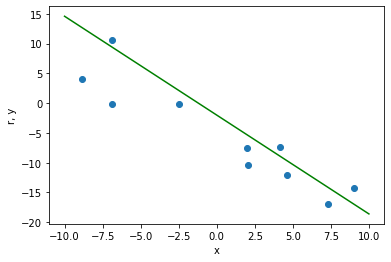

In [29]:
import numpy as np
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import math

# seed random generator such that it always returns the same random values 
# (for reproducability of results)
rng = np.random.RandomState(42)

# Same function as in Linear regression tutorial (but slightly more compact)
# to generate random data from a noisy linear model
def LinearModel(n=10, x_range = [-1,1], w_true = [1,1], epsilon = 5):
    x = rng.rand(n,1) * (x_range[1]-x_range[0]) + x_range[0]
    X = np.hstack((x,np.ones((n,1))))
    r = np.dot(X, w_true) + rng.randn(n, 1)*epsilon   
    return x,r

# Apply normal form linear regression
def LinearRegression(x,r):
    X = np.hstack((x,np.ones((x.shape[0],1))))
    w = np.dot(np.dot(np.linalg.pinv(np.dot(X.T , X)), X.T), r)
    y = np.dot(X, w)
    return w, y

# Compute total MSE for linear model and given weight values [w_0, w_1]
def total_cost_mse(x, r , w):
    X = np.hstack((x,np.ones((x.shape[0],1))))
    err = np.dot(X, w) - r
    mse = np.dot(err.T,err)
    return mse

# parameters
n = 10
x_range = [-10,10]
w_true = np.array([[-1.66],[-2.0]])
epsilon = 5

# Generate data points
x,r = LinearModel(n=n, x_range = x_range, w_true = w_true, epsilon = epsilon)
w,y = LinearRegression(x,r)

print("Ground truth weights ",str(w_true))
print(" Trained weights ",str(w))

# plot data
X_ground = np.hstack((np.array([[-10.0],[10.0]]),np.ones((2,1))))
ground_truth = np.dot(X_ground, w_true)

plt.figure()
plt.scatter(x, r)
plt.plot((-10.0, 10.0),ground_truth,color = 'g')
plt.xlabel("x")
plt.ylabel("r, y")
plt.show()

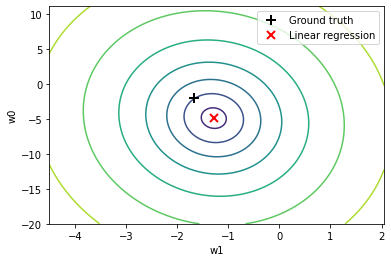

In [30]:
ranges0 = np.arange(-4.5,+2.1,0.05)
ranges1 = np.arange(-20.0,+11.1,0.05)

[W0,W1] = np.meshgrid(ranges0,ranges1)
cost = np.zeros(W0.shape)
wval = np.zeros((2,1))
for idx1 in range(W0.shape[0]):
    for idx2 in range(W0.shape[1]):
        wval[0,0]=W0[idx1,idx2]
        wval[1,0]=W1[idx1,idx2]
        cost[idx1,idx2] = math.log(total_cost_mse(x, r , wval))

plt.figure()
plt.contour(W0,W1,cost)
plt.plot(w_true[0,0],w_true[1,0],'+k', label='Ground truth', mew=2, ms=10)
plt.plot(w[0,0],w[1,0],'xr', label='Linear regression', mew=2, ms=8)
plt.legend()
plt.xlabel("w1")
plt.ylabel("w0")
plt.show()

As can be expected, the parameters found by linear regression coincide with the minimum of the MSE cost landscape. Given the amount of noise on the data and the very limited number of data points, this minimum is different from the actual ground truth from which the data was generated. 

In gradient descent, a minimum for the cost function $E({\mathbf \theta})$ is sought by iteratively applying the following update equation: $${\mathbf \theta}_{t+1} = {\mathbf \theta}_{t+1} - \eta \nabla_{{\mathbf \theta}}E({\mathbf \theta})$$ in which $t$ indicates the iteration, and $\nabla$ is the **gradient**, i.e., the vector containing all derivatives 
$$\frac{\partial E({\mathbf \theta})}{\partial \theta_i}.$$ 
$\eta$ is the **learning rate** which tunes the convergence speed of the learning. If $\eta$ is chosen too small, convergence is very slow. However, if $\eta$ is too large, the learning algorithm may overshoot the minimum and even diverge if the gradients are large.

Gradient descent is most commonly used in machine learning in situations where the loss function is differentiable with respect to the parameters ${\mathbf \theta}$ and no analytical solution exists. However, also when an analytical solution does exist, an iterative approach using gradient descent is often faster when the matrix operations becom too computation intensive. In what follows, we will use linear regression for demonstrating the properties and problems of gradient descent.

The code below implements batch gradient descent for linear regression. In this approach, all training data is used in each iteration to estimate the gradient as well as possible. Although this is the most robust approach, it also tends to become slow for large datasets.

Note that, like Matlab, Python is especially efficient at vector and matrix operations. For this reason, in the code below, all the summations have been compacted into vector-matrix computations (they are equivalent to an implementation with summations).

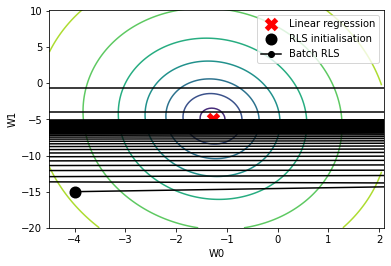

In [36]:
def batch_rls(x,r,w_init,iter):
    X = np.hstack((x,np.ones((x.shape[0],1))))
    w_rls = np.zeros((2,iterations))
    
    w_rls[:,0:1] = w_init + eta * np.dot(X.T, (r-np.dot(X, w_init)))

    for i in range(iterations-1):
        w_rls[:,i+1:i+2] = w_rls[:,i:i+1] + eta * np.dot(X.T, (r-np.dot(X, w_rls[:,i:i+1])))
    
    return w_rls

# Batch RLS training
iterations = 200

# learning rate
# Try setting the learning rate to 0.0001, 0.005, or 0.56 and explain what happens
eta = 0.01

# set initial values (normally random, 
# but here chosen to be far away from the optimal values
w_init = np.array([[-4.0],[-15.0]])    

w_rls = np.hstack((w_init,batch_rls(x,r,w_init,iter)))
    
plt.figure()
plt.contour(W0,W1,cost)
plt.plot(w[0,0],w[1,0],'xr', label='Linear regression', mew=5, ms=10)
plt.plot(w_init[0],w_init[1],'ok', label='RLS initialisation', mew=2, ms=10)
plt.plot(w_rls[0,:],w_rls[1,:],'o-k', label='Batch RLS')
plt.legend()
plt.xlim(-4.5,2.1)
plt.ylim(-20,10.1)
plt.xlabel("W0")
plt.ylabel("W1")
plt.show()

You can play around with the learning rate to see what happens to the convergence. In practice, tuning the learning rate is one of the more difficult aspects of any gradient descent approach.

Although using all the data for gradient estimation is the most robust approach, it also becomes slow for large datasets. In contrast, the other extreme of using only a single data point (*stochastic gradient descent*) is much faster but may suffer from convergence problems due to the noise on the estimated gradient in each iteration. In practice, it is ost common to randomly select a subset of the training data of fixed size in each iteration. This approach is generally called mini-batch gradient descent. It shouldn't surprise you that the mini-batch size is yet another hyperparameter we need to tune (besides the learning rate and the number of iterations).

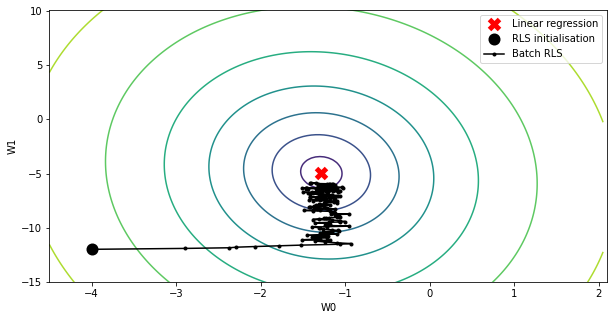

In [40]:
def mini_batch_rls(x,r,w_init,iter,batch_size):
    w_rls = np.zeros((2,iterations))
    
    idx = np.random.permutation(x.shape[0])
    idx = idx[:batch_size]
    X = np.hstack((x[idx[:batch_size],:],np.ones((batch_size,1))))
    r_batch = r[idx[:batch_size],:]
    w_rls[:,0:1] = w_init + eta * np.dot(X.T, (r_batch-np.dot(X, w_init)))

    for i in range(iterations-1):
        idx = np.random.permutation(x.shape[0])
        idx = idx[:batch_size]
        X = np.hstack((x[idx[:batch_size],:],np.ones((batch_size,1))))
        r_batch = r[idx[:batch_size],:]
        w_rls[:,i+1:i+2] = w_rls[:,i:i+1] + eta * np.dot(X.T, (r_batch-np.dot(X, w_rls[:,i:i+1])))
    
    return w_rls

# Batch RLS training
iterations = 200
batch_size = 5

# learning rate
# Try setting the learning rate to 0.0001 or 0.005 and see what happens
eta = 0.002

# set initial values (normally random, 
# but here chosen to be far away from the optimal values
w_init = np.array([[-4.0],[-12.0]])    

w_rls = np.hstack((w_init,mini_batch_rls(x,r,w_init,iter,batch_size)))
    
plt.figure(figsize=(10,5))
plt.contour(W0,W1,cost)
plt.plot(w[0,0],w[1,0],'xr', label='Linear regression', mew=5, ms=10)
plt.plot(w_init[0],w_init[1],'ok', label='RLS initialisation', mew=2, ms=10)
plt.plot(w_rls[0,:],w_rls[1,:],'.-k', label='Batch RLS')
plt.legend()
plt.xlim(-4.5,2.1)
plt.ylim(-15,10.1)
plt.xlabel("W0")
plt.ylabel("W1")
plt.show()

The gradient gives both, the direction of the steepest slope and the magnitude of the slope. Since MSE is quadratic, this results in large steps being taken in the beginning, when we are far from the optimum. This in turn leads to overshooting the 'valley' in which the optimum can be found. One way to solve this is *gradient normalisation* which is the same as normalising the gradient vector before applying the update rule. This is illustrated in the code below.

[9 2 3 5 4 7 8 0 6 1]


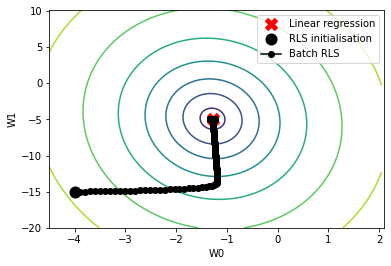

In [33]:
def mini_batch_rls_normalised(x,r,w_init,iter,batch_size):
    w_rls = np.zeros((2,iterations))
    
    idx = np.random.permutation(x.shape[0])
    idx = idx[:batch_size]
    print(str(idx))
    X = np.hstack((x[idx[:batch_size],:],np.ones((batch_size,1))))
    r_batch = r[idx[:batch_size],:]
    upd = np.dot(X.T, (r_batch-np.dot(X, w_init)))
    w_rls[:,0:1] = w_init + eta * upd/math.sqrt(np.dot(upd.T,upd))

    for i in range(iterations-1):
        idx = np.random.permutation(x.shape[0])
        idx = idx[:batch_size]
        X = np.hstack((x[idx[:batch_size],:],np.ones((batch_size,1))))
        r_batch = r[idx[:batch_size],:]
        upd = np.dot(X.T, (r_batch-np.dot(X, w_rls[:,i:i+1])))
        w_rls[:,i+1:i+2] = w_rls[:,i:i+1] + eta * upd/math.sqrt(np.dot(upd.T,upd))    
    return w_rls

# Batch RLS training
iterations = 200
batch_size = 10


# learning rate
# Try setting the learning rate to 0.0001 or 0.005 and see what happens
eta = 0.1

# set initial values (normally random, 
# but here chosen to be far away from the optimal values
w_init = np.array([[-4.0],[-15.0]])    

w_rls = np.hstack((w_init,mini_batch_rls_normalised(x,r,w_init,iter,batch_size)))
    
plt.figure()
plt.contour(W0,W1,cost)
plt.plot(w[0,0],w[1,0],'xr', label='Linear regression', mew=5, ms=10)
plt.plot(w_init[0],w_init[1],'ok', label='RLS initialisation', mew=2, ms=10)
plt.plot(w_rls[0,:],w_rls[1,:],'o-k', label='Batch RLS')
plt.legend()
plt.xlim(-4.5,2.1)
plt.ylim(-20,10.1)
plt.xlabel("W0")
plt.ylabel("W1")
plt.show()

The result of normalising the gradient is that steps of equal length are being taken when updating the weights. However, one good thing of the unnormalised variant was that, as we approximete the optimum, the gradients got smaller and therefore also the update steps. In the normalised version, the learning rate fixes the size of the update steps and therefore also the precision with which the optimum can be approximated.

A simple approach to fix this is to use exponentially decaying learning rates. This fixes the convergence problem by introducing another tuning parameter. However, this is still far from optimal, since there is no reason to assume that either the learning rate or its decay should be the same in all directions (i.e., for all parameters). As a consequence, a number of less and more complex adaptive learning rate algorithms have been proposed, some of which are now commonly used in neural networks and deep learning. A comprehensive overview of advanced techniques can be found on http://sebastianruder.com/optimizing-gradient-descent/. We will loook deeper into them in the next lecture.